# IMPORTACIÓN LIBRERIAS

In [22]:
import numpy as np
import pandas as pd
from math import *
import math
import matplotlib.pyplot as plt
# from PIL import Image
import seaborn as sns
# import itertools
# import io 
# import plotly.offline as py
#py.init_notebook_mode(connect=True)
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# CARGA ARCHIVOS

In [4]:
def load_dataset(file_path, file_type=None, separator=None, encoding='utf-8', **kwargs):
    """
    Loads a dataset in different formats, with support for custom separators, encoding, and more options.
    """
    # If the file type is not specified, infer from file extension
    if not file_type:
        file_type = file_path.split('.')[-1].lower()

    # Load according to the file type
    if file_type == 'csv':
        return pd.read_csv(file_path, sep=separator or ',', encoding=encoding, **kwargs)
    elif file_type in ['xls', 'xlsx']:
        return pd.read_excel(file_path, **kwargs)
    elif file_type == 'json':
        return pd.read_json(file_path, encoding=encoding, **kwargs)
    else:
        raise ValueError(f"File format '{file_type}' not supported. Use 'csv', 'excel', or 'json'.")

In [9]:
df = load_dataset('../data/Fisio-Nutri 01.09.2024 a 01.09.2025 FORMATO BUENO.xlsx', sheet_name="adaptado")

In [10]:
df_servicios= df.copy()

#### CONVERTIR TIPADO COLUMNAS

In [11]:
df_servicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IdPersona                        53 non-null     int64  
 1   Concepto                         53 non-null     object 
 2   Importe_2024_servicios           53 non-null     object 
 3   Cantidad_2024_servicios          53 non-null     object 
 4   Importe_2025_servicios           53 non-null     object 
 5   Cantidad_2025_servicios          53 non-null     object 
 6   Importe_total_pagado_servicios   53 non-null     float64
 7   Cantidad_total_pagado_servicios  53 non-null     int64  
 8   TipoServicio                     53 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ KB


In [12]:
df_servicios.columns

Index(['IdPersona', 'Concepto', 'Importe_2024_servicios',
       'Cantidad_2024_servicios', 'Importe_2025_servicios',
       'Cantidad_2025_servicios', 'Importe_total_pagado_servicios',
       'Cantidad_total_pagado_servicios', 'TipoServicio'],
      dtype='object')

In [14]:
cols_numericas = [ 'IdPersona','Importe_2024_servicios','Cantidad_2024_servicios', 'Importe_2025_servicios',
                   'Cantidad_2025_servicios', 'Importe_total_pagado_servicios', 'Cantidad_total_pagado_servicios']  # pon aquí las que quieras

for col in cols_numericas:
    df_servicios[col] = pd.to_numeric(df_servicios[col], errors="coerce")


In [15]:
servicios_eda= df_servicios.copy()

#### ¿Hay nulos?

-PRE


📌 Variables with missing values:


,Total Missing,Percentage Missing
Importe_2024_servicios,32,60.377358
Cantidad_2024_servicios,32,60.377358
Importe_2025_servicios,16,30.188679
Cantidad_2025_servicios,16,30.188679


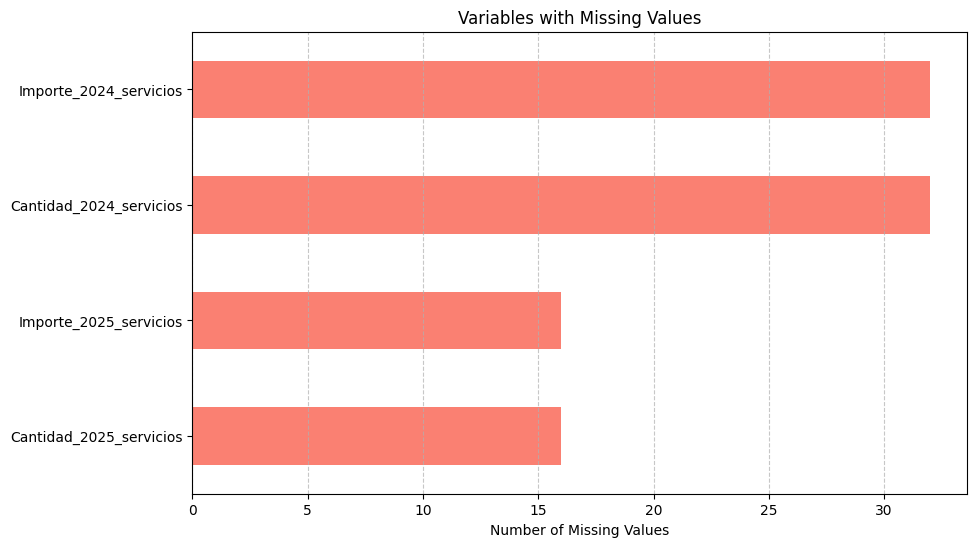

In [16]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = servicios_eda.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(servicios_eda)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")

Como son valores dependiendo de si compra o no los diferentes usuarios se reemplaza los valores nulos de cada columa y fila por un 0


In [18]:
servicios_eda=servicios_eda.fillna(0)
servicios_eda.isnull().sum()

IdPersona                          0
Concepto                           0
Importe_2024_servicios             0
Cantidad_2024_servicios            0
Importe_2025_servicios             0
Cantidad_2025_servicios            0
Importe_total_pagado_servicios     0
Cantidad_total_pagado_servicios    0
TipoServicio                       0
dtype: int64

#### ¿Hay duplicados?

In [19]:
print("\n🔍 Duplicate Rows:")

# Count how many rows are duplicates
duplicated_rows = servicios_eda.duplicated().sum()
if duplicated_rows > 0:
    print("🔴 Duplicate Rows:")
    display(servicios_eda[servicios_eda.duplicated()])  # Show duplicate rows
else:
    print('No duplicate rows')

# Check for duplicate columns
print("\n🔍 Duplicate Columns:")

# Transpose the dataFrame to check for duplicate columns
duplicated_columns = servicios_eda.T.duplicated().sum()
if duplicated_columns > 0:
    display(servicios_eda[servicios_eda.duplicated()])  # Show duplicate columns
else:
    print('No duplicate columns')


🔍 Duplicate Rows:
No duplicate rows

🔍 Duplicate Columns:
No duplicate columns


#### DEFINICIÓN COLUMNAS SEGUN TIPO VARIABLE

In [20]:
def tipo_variables(df):
    dtypes = df.dtypes
    categorical_cols = []
    numerical_cols = []
    for col, dtype in dtypes.items():
        if pd.api.types.is_numeric_dtype(dtype):
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return numerical_cols, categorical_cols
    
vbles = tipo_variables(servicios_eda)
num_vbles =vbles[0]
cat_vbles = vbles[1]

print(cat_vbles)
print(num_vbles)

['Concepto', 'TipoServicio']
['IdPersona', 'Importe_2024_servicios', 'Cantidad_2024_servicios', 'Importe_2025_servicios', 'Cantidad_2025_servicios', 'Importe_total_pagado_servicios', 'Cantidad_total_pagado_servicios']


#### DISTRIBUCIÓN VARIABLES NÚMERICAS (KDE)

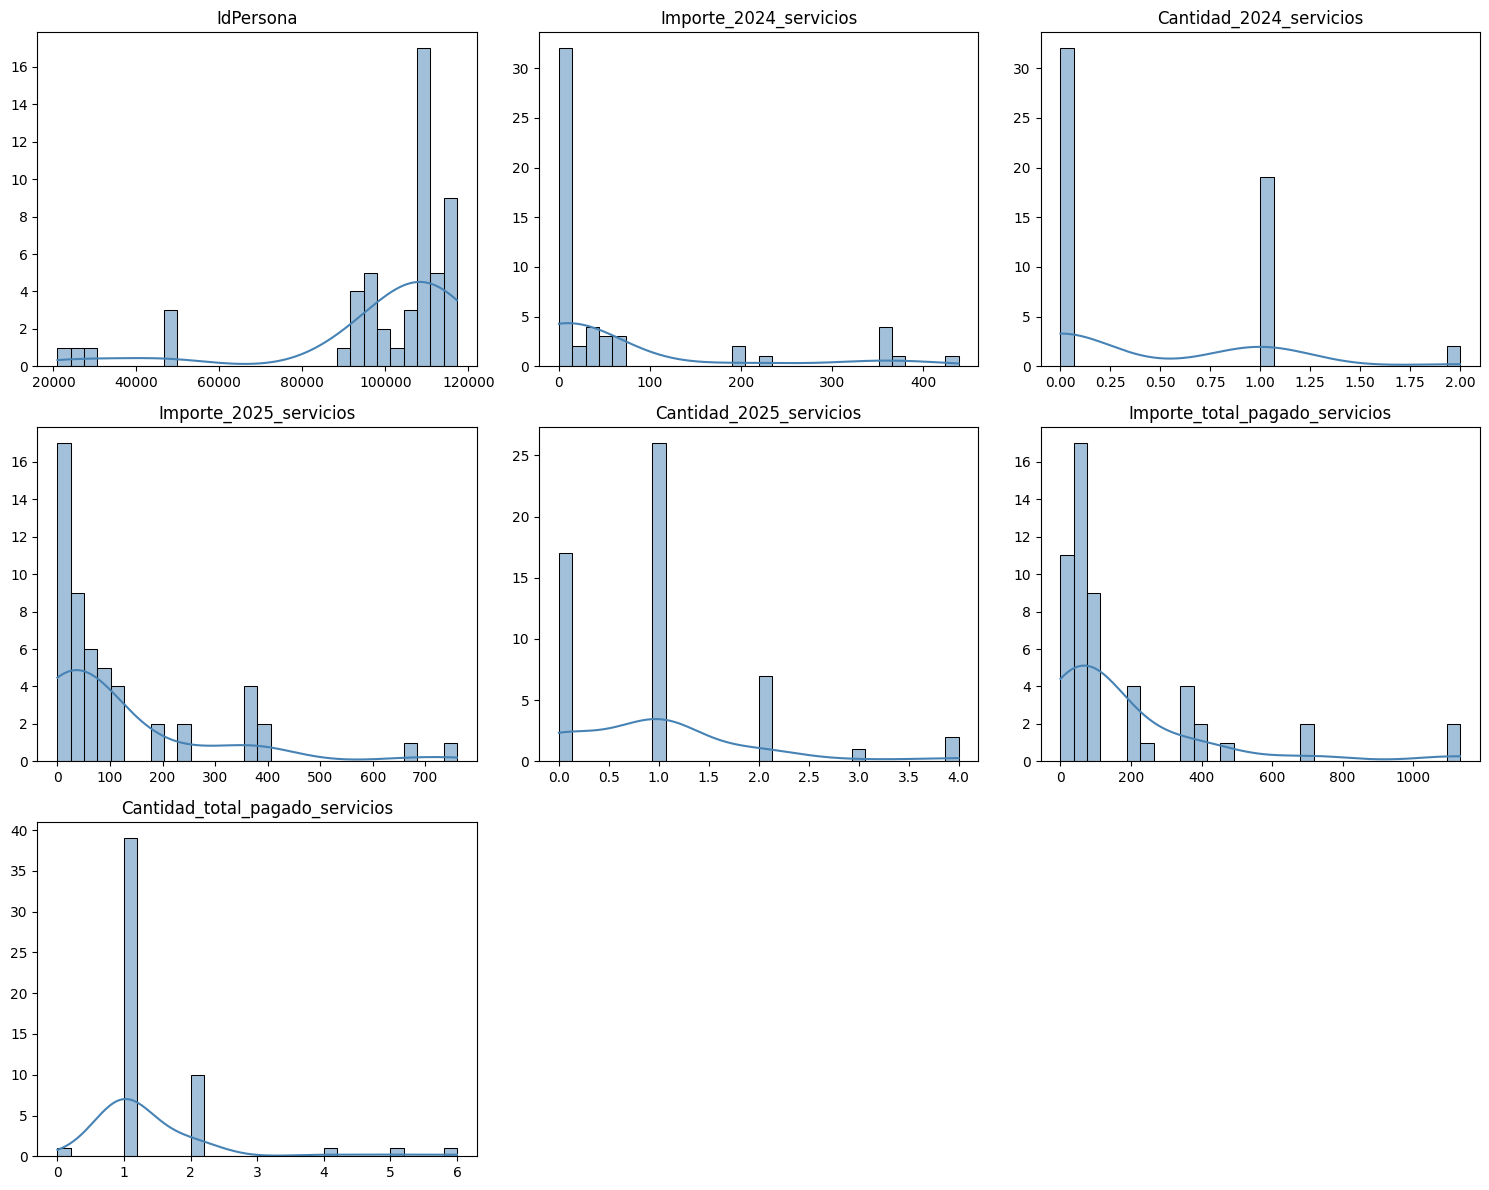

In [23]:
n = len(num_vbles)
cols = 3  # Número de columnas del grid
rows = math.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*4))  # Ajusta el tamaño según tu número de variables

for i, var in enumerate(num_vbles, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(servicios_eda[var], bins=30, kde=True, color='steelblue')
    plt.title(var)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### DISTRIBUCIÓN VARIABLES CATEGORICAS (PIE CHART)


🧁 Distribution of Categorical Variables (2 variables):


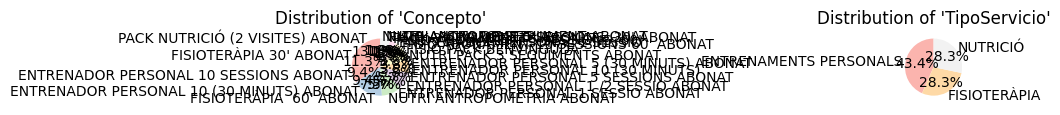

In [24]:
# Select categorical columns (objects)
cat_cols = servicios_eda.select_dtypes(include='object').columns
n_cat = len(cat_cols)  # Count how many categorical variables there are

# If there are categorical variables
if n_cat > 0:
    print(f"\n🧁 Distribution of Categorical Variables ({n_cat} variables):")

    # Define the number of columns in the grid for pie charts (default is 3)
    cols = 3 

    # Calculate how many rows are needed to fit all the charts
    rows = math.ceil(n_cat / cols)
    
    # Set figure size based on number of columns and rows
    plt.figure(figsize=(cols * 5, rows * 4))
    
    # Generate a pie chart for each categorical variable
    for i, var in enumerate(cat_cols, 1): 
        
        # Create a subplot in the grid
        plt.subplot(rows, cols, i)

        # Create the pie chart with the values of the 'var' column
        servicios_eda[var].value_counts().plot.pie(autopct='%1.1f%%',  # Show percentage in each section
                                            startangle=90,  # Start the chart at 90 degrees
                                            cmap='Pastel1')  # Soft colors for pie chart
        
        plt.title(f"Distribution of '{var}'")
        plt.ylabel('')  # Remove label on y-axis, as it's unnecessary in pie charts
    
    plt.tight_layout()  # Adjust layout to avoid overlap between charts
    plt.show()
else:
    print("⚠️ No categorical variables found.")

#### MAPA CORRELACIONES VARIABLES

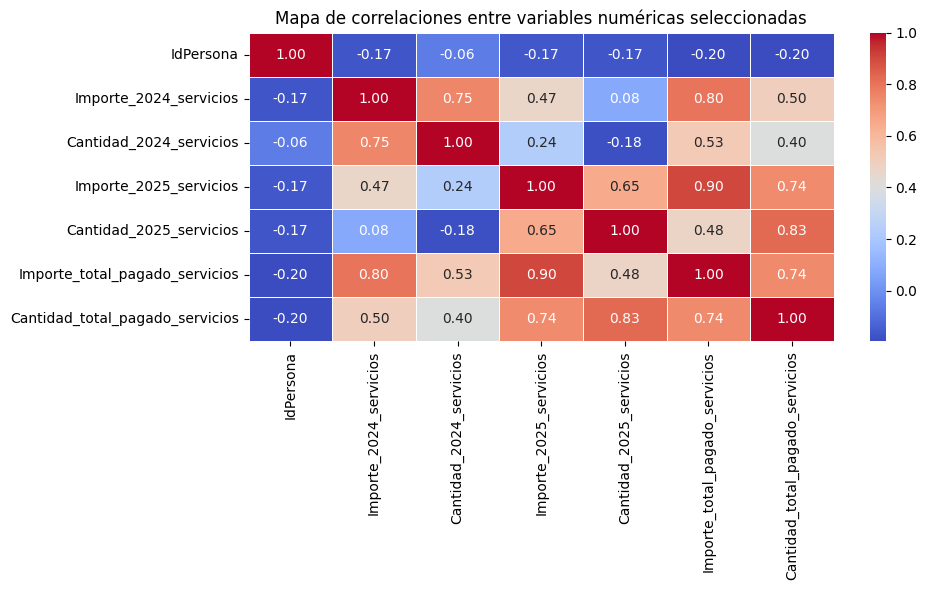

In [25]:
# Calcular la matriz de correlación
corr_matrix = servicios_eda[num_vbles].corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de correlaciones entre variables numéricas seleccionadas")
plt.tight_layout()
plt.show()

# FEATURE ENGINEERING


In [26]:
len(df_servicios['IdPersona'].unique())

41

In [27]:
df_servicios['TipoServicio'].unique()

array(['ENTRENAMENTS PERSONALS', 'FISIOTERÀPIA', 'NUTRICIÓ'], dtype=object)

In [28]:
df_servicios['Concepto'].unique()

array(['ENTRENADOR PERSONAL 1 SESSIÓ ABONAT',
       'ENTRENADOR PERSONAL 10 (30 MINUTS)',
       'ENTRENADOR PERSONAL 10 SESSIONS ABONAT',
       'ENTRENADOR PERSONAL 5 SESSIONS ABONAT',
       'ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT',
       'ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT',
       'ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT',
       'ENTRENADOR PERSONAL 1 SESSIO', "FISIOTERÀPIA  60' ABONAT",
       "FISIOTERÀPIA 30' ABONAT", "FISIO ABONAMENT 5 SESSIONS  60'  ",
       "FISIO ABONAMENT 10 SESSIONS 60' ABONAT",
       "FISIO ABONAMENT 5 SESSIONS  30' ABONAT", 'FISIO PACK BENVINGUDA',
       'PACK 3 SEGUIMENTS ABONAT', 'PACK NUTRICIÓ (2 VISITES) ABONAT',
       'NUTRI ANTROPOMETRIA ABONAT', 'NUTRI PACK 3 SEGUIMENTS ABONAT',
       'NUTRI VISITA DE SEGUIMENT ABONAT', 'NUTRI ANTROPOMETRIA'],
      dtype=object)

Se agrupan los datos por ID Persona y se calculan nuevas variables

In [29]:
# Agrupar por IdPersona para sumar los importes y cantidades
df_agregado = df_servicios.groupby('IdPersona').agg({
    'Concepto': 'nunique',  # Cuántos servicios distintos ha utilizado
    'TipoServicio': 'nunique'  # Cuántos tipos de servicio ha utilizado
}).reset_index()
df_agregado= df_agregado.rename(columns={
    'Concepto': 'Total_conceptos_unicos',
    'TipoServicio': 'Total_tipos_servicios_unicos'
})

#### ONE-HOT ENCODING + CONCATENACIÓN Y AGRUPACIONES

In [30]:
# Aplicar One-Hot Encoding al concepto y tipo de servicio
df_one_hot_concepto = pd.get_dummies(df_servicios['Concepto'], prefix='Concepto', drop_first=False)
df_one_hot_tipo_servicio = pd.get_dummies(df_servicios['TipoServicio'], prefix='TipoServicio', drop_first=False)

# Concatenar los datos originales con las columnas de one-hot encoding
df_servicios_encoded = pd.concat([df_servicios, df_one_hot_concepto, df_one_hot_tipo_servicio], axis=1)

# Agrupar por IdPersona para obtener las sumas de los one-hot encoded
df_encoded_grouped = df_servicios_encoded.groupby('IdPersona').agg('sum').reset_index()
df_servicios_final = pd.merge(df_encoded_grouped, df_agregado, on='IdPersona', how='left')

In [31]:
#Comprobacion de un caso
df_servicios_final[df_servicios_final['IdPersona']== 92269]

,IdPersona,Concepto,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,TipoServicio,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,...,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos
7,92269,ENTRENADOR PERSONAL 10 SESSIONS ABONATENTRENAD...,1078.4,4.0,760.2,4.0,1838.6,8,ENTRENAMENTS PERSONALSENTRENAMENTS PERSONALSFI...,0,...,0,0,0,0,0,2,1,0,3,2


#### ELIMINACIÓN DE COLUMNAS INNECESARIAS

In [32]:
df_servicios_final = df_servicios_final.drop(columns=['Concepto', 'TipoServicio'])
df_servicios_final

,IdPersona,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,...,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos
0,20976,0.00,0.0,44.70,1.0,44.70,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,25409,0.00,0.0,26.90,1.0,26.90,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,29665,0.00,0.0,44.70,1.0,44.70,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,46715,438.75,2.0,673.50,3.0,1112.25,5,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,46901,0.00,0.0,236.85,1.0,236.85,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5,46978,232.20,1.0,236.85,1.0,469.05,2,0,0,0,...,0,0,0,0,0,1,0,0,1,1
6,90023,0.00,0.0,26.90,1.0,26.90,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
7,92269,1078.40,4.0,760.20,4.0,1838.60,8,0,0,0,...,0,0,0,0,0,2,1,0,3,2
8,92364,0.00,0.0,107.60,4.0,107.60,4,0,0,0,...,0,0,0,0,0,0,1,0,1,1
9,95199,0.00,0.0,53.80,2.0,53.80,2,1,0,0,...,0,0,0,0,0,1,0,0,1,1


Afirmamos que se ha creado correctamente ya que tiene el dataframe final la misma longitud de IdPersona en valores unicos del dataframe inicial 

Añadimos una nueva columna para dar información general de si ha usado servicios extra o no, todos tienen que ser True. Eso ayudara después de la union a diferenciar esos clientes que no han usado ese tipo de servicios

In [33]:
df_servicios_final["UsoServiciosExtra"] = True

In [34]:
df_servicios_final.head()

,IdPersona,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,...,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,20976,0.00,0.0,44.70,1.0,44.70,1,0,0,0,...,0,0,0,0,0,1,0,1,1,True
1,25409,0.00,0.0,26.90,1.0,26.90,1,0,0,0,...,0,0,0,0,0,1,0,1,1,True
2,29665,0.00,0.0,44.70,1.0,44.70,1,0,0,1,...,0,0,0,0,1,0,0,1,1,True
3,46715,438.75,2.0,673.50,3.0,1112.25,5,0,0,0,...,0,0,0,0,0,1,0,1,1,True
4,46901,0.00,0.0,236.85,1.0,236.85,1,0,0,0,...,0,0,0,0,1,0,0,1,1,True


# GUARDAMOS DATAFRAME RESULTANTE 

Ese dataframe se guarda para reutilizarse posteriormente para crear el archivo final para el modelo. Se guarda en formato CSV.

In [37]:
# Guardar el DataFrame en un archivo CSV
df_servicios_final.to_csv('../data/servicios_final.csv', index=False)